# How stance affects win % in UFC fights

First, we check the names of the columns in our dataset.

In [33]:
import pandas as pd 
rawData = pd.read_csv('ufc-fighters-statistics.csv') 
for col in data.columns:
    print(col)

name
nickname
wins
losses
draws
height_cm
weight_in_kg
reach_in_cm
stance
date_of_birth
significant_strikes_landed_per_minute
significant_striking_accuracy
significant_strikes_absorbed_per_minute
significant_strike_defence
average_takedowns_landed_per_15_minutes
takedown_accuracy
takedown_defense
average_submissions_attempted_per_15_minutes
Total fights
win%


Next, we focus on fighter records and add a new "win %" column.

In [34]:
data['Total fights'] = data['wins'] + data['losses'] + data['draws']

records = data[['name', 'wins', 'losses', 'draws', 'Total fights']].copy()

records['win%'] = (data['wins'] / data['Total fights']) * 100

print(str(records['name'].nunique()) + ' fighters in dataset.')

4105 fighters in dataset.


After that, we remove fighters with 0 fights on their record.

In [35]:
# create a Boolean mask for the rows to remove
mask = records['Total fights'] == 0

# select all rows except the ones that contain '0' in the 'Total fights' column
records = records[~mask]

print(str(records['name'].nunique()) + ' fighters remaining in dataset.')

4086 fighters remaining in dataset.


Next, we add a "stance" column and remove fighters whose stance was not recorded.

In [36]:
data['win%'] = (data['wins'] / data['Total fights']) * 100
stancewin = data[['name', 'wins', 'losses', 'draws', 'Total fights', 'win%', 'stance']]

stancewin = stancewin.dropna()

print(str(stancewin['name'].nunique()) + ' fighters remaining in dataset.')

3284 fighters remaining in dataset.


We then check how many fighters used each stance.

In [37]:
print("Open stance: " + str(stancewin['stance'].value_counts()['Open Stance']))
print("Orthodox: " + str(stancewin['stance'].value_counts()['Orthodox']))
print("Sideways: " + str(stancewin['stance'].value_counts()['Sideways']))
print("Southpaw: " + str(stancewin['stance'].value_counts()['Southpaw']))
print("Switch: " + str(stancewin['stance'].value_counts()['Switch']))

Open stance: 7
Orthodox: 2526
Sideways: 3
Southpaw: 560
Switch: 192


We will focus on the three stances for which we have the most fighters - Orthodox, Southpaw, and Switch. 

In [38]:
striking = data[['stance', 'significant_strikes_landed_per_minute','significant_striking_accuracy','significant_strikes_absorbed_per_minute','significant_strike_defence','win%']]
stances = ["Orthodox", "Southpaw", "Switch"]
striking = striking[striking['stance'].isin(stances)]
mapping = {striking.columns[0]:'Stance',striking.columns[1]:'Landed',striking.columns[2]:'Accuracy %',striking.columns[3]:'Absorbed',striking.columns[4]:'Defended %',striking.columns[5]:'Win %'}
striking.rename(columns=mapping, inplace=True)
grouped = striking.groupby("Stance")
print(grouped.mean())
print("-------------")

            Landed  Accuracy %  Absorbed  Defended %      Win %
Stance                                                         
Orthodox  2.769786   39.878860  3.610479   48.308789  67.579040
Southpaw  2.698929   41.376786  3.298643   48.571429  68.277739
Switch    3.484323   43.098958  3.928958   44.989583  73.650617
-------------


We can see that there is a small, but noticable difference between the win % for "Switch" fighters, compared to "orthodox" and "southpaw" fighters. This shown in the bar chart below:

Text(0, 0.5, 'Win %')

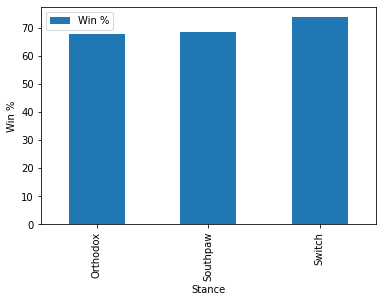

In [39]:
groupedWinPerc = grouped[['Stance','Win %']]

plot = groupedWinPerc.mean().plot.bar()
plot.set_xlabel('Stance')
plot.set_ylabel('Win %')

Next, we perform a t-test to determine whether there are significant differences between the win percentages for fighters using each stance.

In [40]:
from scipy import stats

A=striking[striking['Stance']=='Orthodox']['Win %'].values.tolist()
B=striking[striking['Stance']=='Southpaw']['Win %'].values.tolist()
C=striking[striking['Stance']=='Switch']['Win %'].values.tolist()


t_check=stats.ttest_ind(A,B)
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('Win % for orthodox significantly different from Southpaw')
    print(str(t_check))
    print("--------------")
else:
    print('Win % for orthodox not significantly different from Southpaw')
    print(str(t_check))
    print("--------------")

t_check=stats.ttest_ind(A,C)
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('Win % for orthodox significantly different from switch')
    print(str(t_check))
    print("--------------")
else:
    print('Win % for orthodox not significantly different from switch')
    print(str(t_check))
    print("--------------")
    
t_check=stats.ttest_ind(B,C)
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('Win % for southpaw significantly different from switch')
    print(str(t_check))
    print("--------------")
else:
    print('Win % for southpaw not significantly different from switch')
    print(str(t_check))
    print("--------------")

Win % for orthodox not significantly different from Southpaw
Ttest_indResult(statistic=-0.8647176672912108, pvalue=0.38726102368041515)
--------------
Win % for orthodox significantly different from switch
Ttest_indResult(statistic=-4.706658250797031, pvalue=2.6443573946678976e-06)
--------------
Win % for southpaw significantly different from switch
Ttest_indResult(statistic=-4.062041243305795, pvalue=5.3767010060451314e-05)
--------------


## Findings:

#### 1. Fighters using a "Switch" stance have a higher average win percentage than fighters using either "orthodox" or "southpaw" stances.

#### 2. There is a statistically significant difference between the win percentage for fighters using a "Switch" stance, and fighters using an "Orthodox" stance.

#### 3. There is a statistically significant difference between the win percentage for fighters using a "Switch" stance, and fighters using a "Southpaw" stance.

#### 4. There is not a statistically significant difference between the win percentage for fighters using a "Orthodox" stance, and fighters using a "Southpaw" stance.

## Conclusion:

#### Fighters who can switch stances are likely to win a higher percentage of their fights than fighters who remain in either orthodox or southpaw stances.